In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

In [ ]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [ ]:
df = pd.read_csv('./titanic.csv')
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]
df = df.dropna()
df

FileNotFoundError: ignored

In [ ]:
# 성별 생존통계  Survived = 0 or 1
df5 = df.groupby('Sex').Survived.count().to_frame()
df5

,Survived
Sex,
female,386
male,658


In [ ]:
# 성별 생존자수   Survived = 1
df6 = df.groupby('Sex').Survived.sum().to_frame()
df6

,Survived
Sex,
female,322
male,93


In [ ]:
# 생존률
df7 = df.groupby('Sex').Survived.mean().to_frame()
df7

,Survived
Sex,
female,0.834197
male,0.141337


In [ ]:
# 성별 탑승자수, 생존자수, 생존률
df8 = pd.concat([df5, df6, df7], axis = 1)
df8.columns = ['승선자수', '생존자수', '생존비율']
df8

,승선자수,생존자수,생존비율
Sex,,,
female,386,322,0.834197
male,658,93,0.141337


In [ ]:
df.groupby(['Sex', 'Pclass']).Survived.mean().to_frame()

Survived
Sex    Pclass          
female 1       0.977099
       2       0.941748
       3       0.638158
male   1       0.264901
       2       0.094937
       3       0.108883

In [ ]:
# 내가만든(사용자정의)함수 적용 .agg(사용자정의함수, 매개변수)
# 사용자함수 선언
def my_mean(values):
  return sum(values) / len(values)

In [ ]:
df.groupby(['Sex', 'Pclass']).Survived.agg(my_mean)

Sex     Pclass
female  1         0.977099
        2         0.941748
        3         0.638158
male    1         0.264901
        2         0.094937
        3         0.108883
Name: Survived, dtype: float64

In [ ]:
df = pd.read_csv('./서울시 코로나19 확진자 현황.csv', 
                 low_memory=False)

In [ ]:
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y


# 데이터 확인 및 전처리

In [ ]:
# 불필요한 컬럼 삭제
df = df.drop(columns=['환자번호', '국적', '환자정보', '조치사항', '이동경로',
                 '등록일', '수정일', '노출여부'
                 ])
df.head()

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-


In [ ]:
# 확진일 --> datetime 
df['확진일'] = pd.to_datetime(df['확진일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  object        
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.6+ MB


In [ ]:
# 서울지역 25개구
print(len(df['지역'].unique()))
uniq = df['지역'].unique()
uniq

29


array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [ ]:
# solution
df['지역'] = df['지역'].str.strip()  # strip: remove spaces at the beginning and at the end of the string

In [ ]:
print(df['지역'].nunique())
df['지역'].unique()

27


array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [ ]:
df['지역'] = df['지역'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [ ]:
# 결측지 확인
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

# 구별 확진자 동향
확진일 - 구별로 pivot_table 집계

In [ ]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


In [ ]:
df_gu = df.pivot_table(index='확진일', columns='지역',  values='연번',
              aggfunc='count', margins=True
               )  
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


In [ ]:
# df.pivot_table(index=['확진일'], columns='지역', #values=['접촉력'],
#               aggfunc='count'  #, margins=True
#                )  

In [ ]:
print(type(df_gu['All']))

<class 'pandas.core.series.Series'>


In [ ]:
df_gu.to_frame()

AttributeError: ignored

In [ ]:
# 서울시 일별 추가확진자 동향
s_date = df_gu['All'][:-1]

In [ ]:
s_date.index

Index([2020-01-24 00:00:00, 2020-01-30 00:00:00, 2020-01-31 00:00:00,
       2020-02-02 00:00:00, 2020-02-05 00:00:00, 2020-02-06 00:00:00,
       2020-02-16 00:00:00, 2020-02-19 00:00:00, 2020-02-20 00:00:00,
       2020-02-21 00:00:00,
       ...
       2021-09-19 00:00:00, 2021-09-20 00:00:00, 2021-09-21 00:00:00,
       2021-09-22 00:00:00, 2021-09-23 00:00:00, 2021-09-24 00:00:00,
       2021-09-25 00:00:00, 2021-09-26 00:00:00, 2021-09-27 00:00:00,
       2021-09-28 00:00:00],
      dtype='object', name='확진일', length=582)

In [ ]:
s_date.values

array([   1,    3,    3,    1,    2,    2,    2,    2,    5,    2,    5,
          3,    4,   16,   10,    9,   12,    5,    5,    6,    7,    1,
          7,    7,   10,   26,   46,   17,   12,    9,    8,    6,   11,
          6,   11,   17,   17,    8,    6,    6,   13,   13,   14,   15,
         22,   22,   19,   24,   16,   20,   20,   20,   10,    8,   10,
         11,    5,    3,    2,    8,    3,    5,    1,    2,    2,    1,
          1,    2,    1,    4,    1,    1,    2,   13,   18,   21,   11,
          8,    5,   12,    6,    4,    1,    7,    9,    4,    3,    3,
          6,    7,    8,   20,   24,   19,    9,    6,    2,   13,   20,
         15,   14,   28,   29,   15,   18,   13,   19,   25,   30,   12,
          8,   12,   12,   24,   18,   17,   14,    8,    4,   11,    8,
         17,   17,   14,    7,    8,    9,   13,   11,    7,   16,    3,
          3,   11,    7,    8,    8,    7,   13,    7,    6,    7,    9,
          6,   10,    3,   21,   17,   12,   20,   

In [ ]:
# 서울시 일별 추가확진자 많은순으로
s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

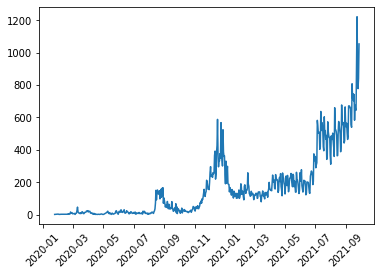

In [ ]:
# 서울시 일별 추가 확진자 시각화
x = s_date.index
y = s_date.values
plt.plot(x, y)
# plt.title('서울시 일별 확진자 시각화')
# plt.xlabel('확진일')
# plt.ylabel('확진자수')
plt.xticks(rotation=45)
plt.show()

In [ ]:
s_gu =  df_gu.loc['All'][:-1]
s_gu = s_gu.sort.values(ascending=False)

AttributeError: ignored

In [ ]:
s_gu

지역
강남구     6926.0
강동구     3782.0
강북구     2606.0
강서구     4447.0
관악구     5418.0
광진구     3486.0
구로구     4168.0
금천구     2064.0
기타      2321.0
노원구     3932.0
도봉구     2605.0
동대문구    3487.0
동작구     4120.0
마포구     3726.0
서대문구    2692.0
서초구     4284.0
성동구     2839.0
성북구     3779.0
송파구     6356.0
양천구     3291.0
영등포구    4463.0
용산구     2705.0
은평구     4284.0
종로구     1617.0
중구      1708.0
중랑구     3729.0
타시도     4715.0
Name: All, dtype: float64

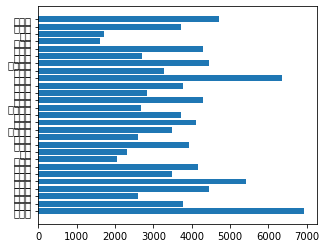

In [ ]:
# 서울시 구별 누적확진자 많은 순 시각화
x = s_gu.index
y = s_gu.values
plt.figure(figsize=(5, 4))
plt.barh(x, y)
# plt.title('서울시 구별 누적확진자수', size=10)
plt.show()

In [ ]:
# 최근일(21-09-28) 기준 지역별 확진자
s_gu1 =  df_gu.iloc[-2][:-1]  # -2 -> 21-09-28
s_gu1 = s_gu.sort.values(ascending=False)

AttributeError: ignored

In [ ]:
x = s_gu1.index
y = s_gu2.values
plt.figure(figsize=(5,4))
plt.barh(x,y)
plt.show()

NameError: ignored

In [ ]:
# 접촉력에 따른 확진 분석
# 접촉력에 따른 확진 건수 best 10
df['접촉력'].unique()

array(['감염경로 조사중', '기타 확진자 접촉', '송파구 소재 시장 관련(?21.9.)', ..., '은평성모병원',
       '명성교회', '종로구 집단발병'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [ ]:
df['접촉력']

0         감염경로 조사중
1         감염경로 조사중
2         감염경로 조사중
3         감염경로 조사중
4         감염경로 조사중
           ...    
99545    기타 확진자 접촉
99546         해외유입
99547     종로구 집단발병
99548         해외유입
99549         해외유입
Name: 접촉력, Length: 99550, dtype: object

In [ ]:
df['접촉력'].value_counts()

기타 확진자 접촉        37943
감염경로 조사중         31964
타시도 확진자 접촉        4244
해외유입              1729
동부구치소 관련          1175
                 ...  
구로구소재 고등학교 관련        1
광진구 소재 병원 관련         1
해외 유입                1
부산시 방문주사 관련          1
안양 목회자 관련            1
Name: 접촉력, Length: 1096, dtype: int64

In [ ]:
df['접촉력'].value_counts()[:10].to_frame() # top 10

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [ ]:
# 최근 월(2021 - 9달) 접촉력에 따른 확진건수 best 10
# 확진일을 연도 2021 & 9월  ['접촉력']

In [ ]:
# Convert the date to datetime64
df['확진일'] = pd.to_datetime(df['확진일'], format='%Y-%m-%d')

In [ ]:
# Filter data between two dates
filtered_df = df.query("확진일 >= '2020-09-01' \
                       and 확진일 <= '2020-09-30'")
filtered_df

,연번,확진일,지역,여행력,접촉력,상태
94227,5323,2020-09-30,기타,NaN,도봉구 다나병원,퇴원
94228,5322,2020-09-30,성동구,NaN,도봉구 다나병원,퇴원
94229,5321,2020-09-30,성동구,NaN,도봉구 다나병원,퇴원
94230,5320,2020-09-30,광진구,NaN,기타 확진자 접촉,퇴원
94231,5319,2020-09-30,강동구,NaN,감염경로 조사중,퇴원
...,...,...,...,...,...,...
95581,3969,2020-09-01,중랑구,NaN,성북구 체대입시 관련,퇴원
95583,3967,2020-09-01,용산구,NaN,기타 확진자 접촉,퇴원
95800,3750,2020-09-01,강남구,NaN,감염경로 조사중,퇴원
96169,3381,2020-09-05,성북구,NaN,감염경로 조사중,퇴원


In [ ]:
filtered_df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,304
감염경로 조사중,286
타시도 확진자 접촉,71
서대문구 세브란스병원,37
강남구 K보건산업,37
도봉구 다나병원,33
도봉구 예마루데이케어센터,30
강남구 소재 대우디오빌플러스,26
관악구 삼모스포렉스,26
강동구 BF모바일 관련,25


In [ ]:
# solution
(df['확진일'].dt.year == 2021 ) & (df['확진일'].dt.month == 9)

0         True
1         True
2         True
3         True
4         True
         ...  
99545    False
99546    False
99547    False
99548    False
99549    False
Name: 확진일, Length: 99550, dtype: bool

In [ ]:
((df['확진일'].dt.year == 2021 ) & (df['확진일'].dt.month == 9))['접촉력']

KeyError: ignored

In [ ]:
df_2021_09['접촉력'].value_counts()[:10].to_frame()